#                                            NYC Covid-19 status in the USA

## What is Covid-19?

Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus.

Most people infected with the COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment.  Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.

The best way to prevent and slow down transmission is to be well informed about the COVID-19 virus, the disease it causes and how it spreads. Protect yourself and others from infection by washing your hands or using an alcohol based rub frequently and not touching your face. 

The COVID-19 virus spreads primarily through droplets of saliva or discharge from the nose when an infected person coughs or sneezes, so it’s important that you also practice respiratory etiquette (for example, by coughing into a flexed elbow).



## Project description

We have a Covid-19 dataset of the USA.

In this project we are going to extract New York City data from this dataset then preprocess, analyse and visualize the data to deliver insights.   

## Dataset Description

This dataset has number of tests conducted in each state at daily level. <br>
Column descriptions are:

date - date of observation <br>
county - US name of county <br>
state - name of the state of the USA <br>
fips -  FIPS codes are numbers which uniquely identify geographic areas<br>
cases - number of test taken <br>
deaths - number of deaths <br> 

## Loading Modules

In [2]:
#packages installed.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots
# Regular expression operations
import re

In [3]:
#pd.set_option()
#display jupyter notebook outputs. It does not matter setting beyond 60.
pd.options.display.max_columns = 60


## Loading Dataset

In [4]:
#dataset of covid-19 cases in the USA.
USA_Counties_Covid_data = pd.read_csv("/Users/suinkim/Downloads/PythonCovid/us_counties_covid19_daily.csv")


In [5]:
#head of the usa covid-19 cases without filter
print(USA_Counties_Covid_data.head())
#tail of the usa covid-19 cases without filter
print(USA_Counties_Covid_data.tail())

         date     county       state     fips  cases  deaths
0  2020-01-21  Snohomish  Washington  53061.0      1       0
1  2020-01-22  Snohomish  Washington  53061.0      1       0
2  2020-01-23  Snohomish  Washington  53061.0      1       0
3  2020-01-24       Cook    Illinois  17031.0      1       0
4  2020-01-24  Snohomish  Washington  53061.0      1       0
              date      county    state     fips  cases  deaths
573333  2020-09-26  Sweetwater  Wyoming  56037.0    332       2
573334  2020-09-26       Teton  Wyoming  56039.0    536       1
573335  2020-09-26       Uinta  Wyoming  56041.0    350       2
573336  2020-09-26    Washakie  Wyoming  56043.0    113       6
573337  2020-09-26      Weston  Wyoming  56045.0     36       0


## Finding New York City data

It was quite tricky to find data of New York City. <br>
Technically, New York City is comprised of 5 counties: Queens, Bronx, Manhattan,  Brooklyn and Staten. <br>
We tried to find these counties in 'county' field in the given dataset.
but we got Empty dataframe as below:

In [6]:
# filter to get only NYC dataset.
counties = USA_Counties_Covid_data['county']

display(USA_Counties_Covid_data[(counties == 'Queens') | (counties == 'Queens County')])

,date,county,state,fips,cases,deaths


I found through data wrangling that in this data set all five New York City's counties have been merged into New York City in County column. Thus, it does not have a fips code value instead NaN value.
I found it by looking all counties in New York State.

In [7]:
# Counties in New York State
onlyNewYorkState = USA_Counties_Covid_data[USA_Counties_Covid_data['state'] == 'New York']
display(onlyNewYorkState)
# Unique County names in New York State
display(onlyNewYorkState.county.unique())

,date,county,state,fips,cases,deaths
416,2020-03-01,New York City,New York,NaN,1,0
448,2020-03-02,New York City,New York,NaN,1,0
482,2020-03-03,New York City,New York,NaN,2,0
518,2020-03-04,New York City,New York,NaN,2,0
519,2020-03-04,Westchester,New York,36119.0,9,0
...,...,...,...,...,...,...
571991,2020-09-26,Washington,New York,36115.0,296,14
571992,2020-09-26,Wayne,New York,36117.0,316,3
571993,2020-09-26,Westchester,New York,36119.0,38050,1456
571994,2020-09-26,Wyoming,New York,36121.0,136,5


array(['New York City', 'Westchester', 'Nassau', 'Rockland', 'Saratoga',
       'Suffolk', 'Ulster', 'Monroe', 'Albany', 'Delaware', 'Dutchess',
       'Herkimer', 'Orange', 'Schenectady', 'Broome', 'Tioga', 'Tompkins',
       'Erie', 'Greene', 'Montgomery', 'Putnam', 'Allegany', 'Onondaga',
       'Ontario', 'Clinton', 'Rensselaer', 'Sullivan', 'Wyoming',
       'Chenango', 'Essex', 'Hamilton', 'Jefferson', 'Livingston',
       'Warren', 'Washington', 'Schoharie', 'Wayne', 'Columbia', 'Fulton',
       'Genesee', 'Niagara', 'Oneida', 'Steuben', 'Cortland', 'Madison',
       'St. Lawrence', 'Cayuga', 'Oswego', 'Otsego', 'Chemung', 'Orleans',
       'Chautauqua', 'Franklin', 'Cattaraugus', 'Schuyler', 'Lewis',
       'Unknown', 'Seneca', 'Yates'], dtype=object)

## Finding Records with Unkown County Values

While finding NYC data we also found there are records with unknown county name.

In [6]:
# unknown country in New York
Unknown = USA_Counties_Covid_data[USA_Countiees_Covid_data['county'] == 'Unknown']
Unknown[Unknown['state'] == "New York"]

,date,county,state,fips,cases,deaths
18873,2020-03-29,Unknown,New York,NaN,0,68
20912,2020-03-30,Unknown,New York,NaN,0,162
23036,2020-03-31,Unknown,New York,NaN,0,268
25230,2020-04-01,Unknown,New York,NaN,0,289
27490,2020-04-02,Unknown,New York,NaN,0,415
29814,2020-04-03,Unknown,New York,NaN,0,608
32200,2020-04-04,Unknown,New York,NaN,0,309
34631,2020-04-05,Unknown,New York,NaN,0,678
66262,2020-04-17,Unknown,New York,NaN,0,630
69019,2020-04-18,Unknown,New York,NaN,0,1170


Finding number of records with unknown counties:

In [7]:
len(Unknown[Unknown['state'] == "New York"].county)

10

## Extracting New York City data

Extracting New York City data from the dataset.

In [16]:
NYCdata = USA_Counties_Covid_data[USA_Counties_Covid_data['county'] == 'New York City']
display(NYCdata)

,date,county,state,fips,cases,deaths
416,2020-03-01,New York City,New York,NaN,1,0
448,2020-03-02,New York City,New York,NaN,1,0
482,2020-03-03,New York City,New York,NaN,2,0
518,2020-03-04,New York City,New York,NaN,2,0
565,2020-03-05,New York City,New York,NaN,4,0
...,...,...,...,...,...,...
559005,2020-09-22,New York City,New York,NaN,245495,23780
562242,2020-09-23,New York City,New York,NaN,245776,23780
565483,2020-09-24,New York City,New York,NaN,246198,23785
568724,2020-09-25,New York City,New York,NaN,246570,23792


## Looking into NYC dataset

### Shape of data

In [17]:
# 210 rows and 6 columns.
NYCdata.shape

(210, 6)

### Describing dataset

In [10]:
#25%, 50%, 75% percentiles. 
NYCdata.describe()

,fips,cases,deaths
count,0.0,210.000000,210.000000
mean,NaN,175434.704762,17378.095238
std,NaN,81171.976756,8508.174349
min,NaN,1.000000,0.000000
25%,NaN,147672.000000,15059.500000
50%,NaN,214434.500000,21564.500000
75%,NaN,231192.000000,23032.250000
max,NaN,247000.000000,23795.000000


<strong>This shows that 'flips' column has NaN values and shoud be removed.<strong>

In [20]:
# select_dtypes. Top means the most common value. The freq is the most common value’s frequency.
NYCdata.describe(include=['O'])

,date,county,state
count,210,210,210
unique,210,1,1
top,2020-06-22,New York City,New York
freq,1,210,210


<strong>This shows that there is no duplicate record.</strong>

### Datatypes

In [12]:
NYCdata.dtypes

date       object
county     object
state      object
fips      float64
cases       int64
deaths      int64
dtype: object

### Checking for Null Values

In [13]:
#sum of null values. 
NYCdata.isnull().sum()

date        0
county      0
state       0
fips      210
cases       0
deaths      0
dtype: int64

<strong>This shows that fips column has null values.</strong>

### First update date of the data

In [14]:
#first day of corona case updated
print("First update date: "+NYCdata.date.min())

First update date: 2020-03-01


### Last update date of the data

In [15]:
#last day updated in dataset.
print("Last update date: "+NYCdata.date.max())

Last update date: 2020-09-26


## Pre-processing

In [23]:
#unnecessary dataset
NYCdata.fips

416      NaN
448      NaN
482      NaN
518      NaN
565      NaN
          ..
559005   NaN
562242   NaN
565483   NaN
568724   NaN
571966   NaN
Name: fips, Length: 210, dtype: float64

### Removing 'fips' code column

Removing the 'fips' column because it contains all NaN(Not a Number) values.

In [24]:
# duplicating
NYCdata_clean = NYCdata
# removing 'flips' column
NYCdata_clean = NYCdata_clean.drop(columns='fips')
display(NYCdata_clean)

,date,county,state,cases,deaths
416,2020-03-01,New York City,New York,1,0
448,2020-03-02,New York City,New York,1,0
482,2020-03-03,New York City,New York,2,0
518,2020-03-04,New York City,New York,2,0
565,2020-03-05,New York City,New York,4,0
...,...,...,...,...,...
559005,2020-09-22,New York City,New York,245495,23780
562242,2020-09-23,New York City,New York,245776,23780
565483,2020-09-24,New York City,New York,246198,23785
568724,2020-09-25,New York City,New York,246570,23792


## Visualizations

#### Total Cases and Deaths

In [27]:
total_cases = NYCdata_clean['cases'].max()
total_deaths = NYCdata_clean['deaths'].max()
print("Cases: %i" % ( total_cases))
print("Deaths: %i (%.1f%% total cases)" % (total_deaths, float(total_deaths)/total_cases*100.0))
#print("Total: %i"%len(total_cases))

Cases: 247000
Deaths: 23795 (9.6% total cases)


              count
Cases        247000
Deaths 9.6%   23795


array([<matplotlib.axes._subplots.AxesSubplot object at 0x119fc1910>],
      dtype=object)

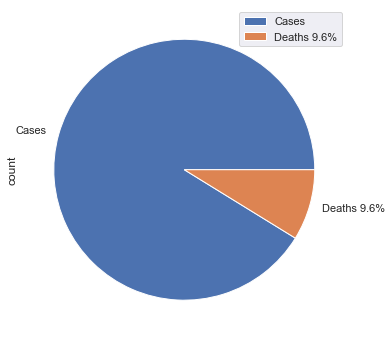

In [28]:
# Making DataFrame of total cases and deaths
total_number = pd.DataFrame([247000,23795], index = ['Cases','Deaths 9.6%'], columns = ['count'])
# Plotting pie chart
display(total_number.plot(subplots=True, kind='pie', figsize=(6, 6)))

### Cases and death timeline plot

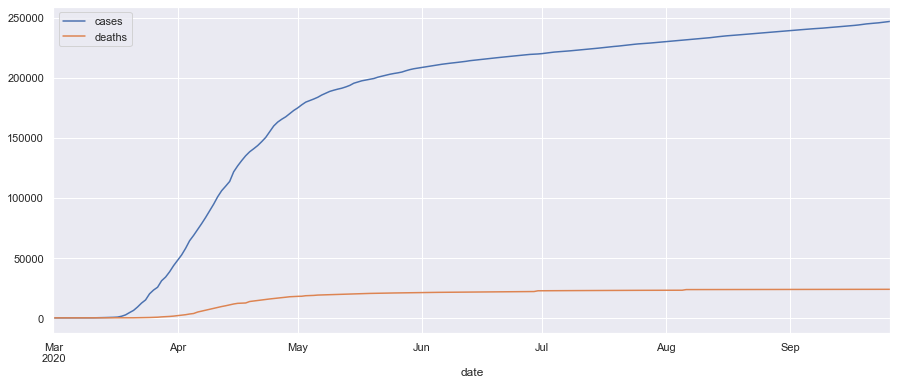

In [38]:
NYCdata_datetime = NYCdata_clean
#making DataFrame of date as follows year-month-day
NYCdata_datetime['date'] = pd.to_datetime(NYCdata_datetime['date'], format='%Y-%m-%d')
NYCdata_datetimeIndex_df = NYCdata_datetime.set_index(['date'])
NYCdata_datetimeIndex_df.index = pd.to_datetime(NYCdata_datetimeIndex_df.index)
NYCdata_datetimeIndex_df[["cases", "deaths"]].plot(figsize=(15,6))

<h3> Cases and death <strong>rate</strong> timeline plot</h3>

,date,county,state,cases,deaths
0,2020-03-01,New York City,New York,1,0
1,2020-03-02,New York City,New York,1,0
2,2020-03-03,New York City,New York,2,0
3,2020-03-04,New York City,New York,2,0
4,2020-03-05,New York City,New York,4,0
...,...,...,...,...,...
205,2020-09-22,New York City,New York,245495,23780
206,2020-09-23,New York City,New York,245776,23780
207,2020-09-24,New York City,New York,246198,23785
208,2020-09-25,New York City,New York,246570,23792


,cases_inc,deaths_inc,date
0,1,0,2020-03-01
1,0,0,2020-03-02
2,1,0,2020-03-03
3,0,0,2020-03-04
4,2,0,2020-03-05
...,...,...,...
205,348,-2,2020-09-22
206,281,0,2020-09-23
207,422,5,2020-09-24
208,372,7,2020-09-25


            cases_inc  deaths_inc
date                             
2020-03-01          1           0
2020-03-02          0           0
2020-03-03          1           0
2020-03-04          0           0
2020-03-05          2           0
...               ...         ...
2020-09-22        348          -2
2020-09-23        281           0
2020-09-24        422           5
2020-09-25        372           7
2020-09-26        430           3

[210 rows x 2 columns]


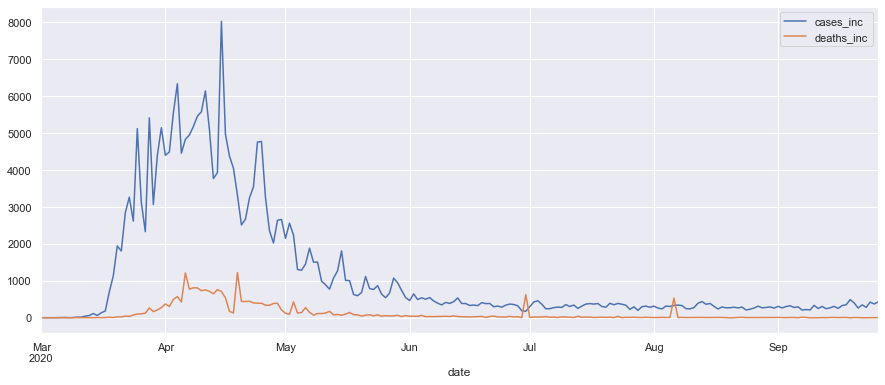

In [40]:
#the rate of differences between cases and deaths of each row
# np.diff: NumpyArray object. returns a list with difference between each consecutive row
onlyCases = list(NYCdata_clean['cases'])
cases_increase_lst = list(np.diff(onlyCases))

# .insert() is list’s function through which we can add element at a specific location. 
#first argument is index of list and second is value.
#used 0 as index to add at the start and 1 as value which is difference between 0 and 1st date’s cases
cases_increase_lst = cases_increase_lst
cases_increase_lst.insert(0,1)

onlyDeaths = list(NYCdata_clean['deaths'])
deaths_increase_lst = list(np.diff(onlyDeaths))

#used 0 as index to add at the start and 0 as value which is between 0 and 1st date’s deaths
deaths_increase_lst = deaths_increase_lst
deaths_increase_lst.insert(0,0)
#In the end there are two lists of difference between each consecutive row’s cases and deaths.

NYCdata_reindexed = NYCdata_clean
#display(NYCdata_clean)
increase_df = pd.DataFrame({"cases_inc":cases_increase_lst, "deaths_inc": deaths_increase_lst})

#NYCdata_reindexed.index = NYCdata_reindexed.reset_index(drop=True)
NYCdata_reindexed.index = increase_df.index
display(NYCdata_reindexed)
increase_df['date'] = NYCdata_reindexed['date']
display(increase_df)

increase_datetime_df = increase_df
increase_datetime_df['date'] = pd.to_datetime(increase_df['date'], format='%Y-%m-%d')
increase_datetimeIndex_df = increase_datetime_df.set_index(['date'])
#indexing in a different form.
increase_datetimeIndex_df.index = pd.to_datetime(increase_datetimeIndex_df.index)
print(increase_datetimeIndex_df)
increase_datetimeIndex_df[["cases_inc", "deaths_inc"]].plot(figsize=(15,6))


<strong>This shows that cases and death rate has decreased since June.</strong>

## Refrences

1. https://www.who.int/health-topics/coronavirus#tab=tab_1

2. https://www.kaggle.com/sudalairajkumar/covid19-in-usa?select=us_counties_covid19_daily.csv 

3. https://nhchc.org/covid-dashboard/